In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import logging
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA

mpl.rcParams['figure.dpi'] = 150
logging.disable(logging.CRITICAL)

In [84]:
df = pd.read_csv('../data/eu_regional_data.csv', index_col = 'region_name')
df.head()

,GDP,Country,EU Region,GDP per Capita,Unemployment %,Life Expectancy,Doctors per 100000,Fatal Road Accidents per Million,Tertiary Educational Attainment %,Population Density,People at Risk of Poverty %,Regular Internet Users %
region_name,,,,,,,,,,,,
Abruzzo,30.89,IT,Southern Europe,24000.0,9.3,82.9,435.45,46.0,21.2,120.5,25.0,78.0
Alentejo,12.44,PT,Southern Europe,17700.0,6.6,80.2,310.06,135.0,21.4,22.7,22.0,70.0
Algarve,8.71,PT,Southern Europe,19900.0,8.3,80.3,419.03,75.0,24.4,88.9,23.2,76.0
Alsace,59.58,FR,Western Europe,31000.0,7.1,81.8,362.21,30.0,39.0,230.6,NaN,75.0
Andalucía,150.56,ES,Southern Europe,17700.0,21.7,81.7,371.83,30.0,32.5,97.4,37.7,84.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Abruzzo to Южен централен (Yuzhen tsentralen)
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GDP                                242 non-null    float64
 1   Country                            242 non-null    object 
 2   EU Region                          242 non-null    object 
 3   GDP per Capita                     242 non-null    float64
 4   Unemployment %                     238 non-null    float64
 5   Life Expectancy                    238 non-null    float64
 6   Doctors per 100000                 173 non-null    float64
 7   Fatal Road Accidents per Million   239 non-null    float64
 8   Tertiary Educational Attainment %  238 non-null    float64
 9   Population Density                 239 non-null    float64
 10  People at Risk of Poverty %        183 non-null    float64
 11  Regular Internet Users %  

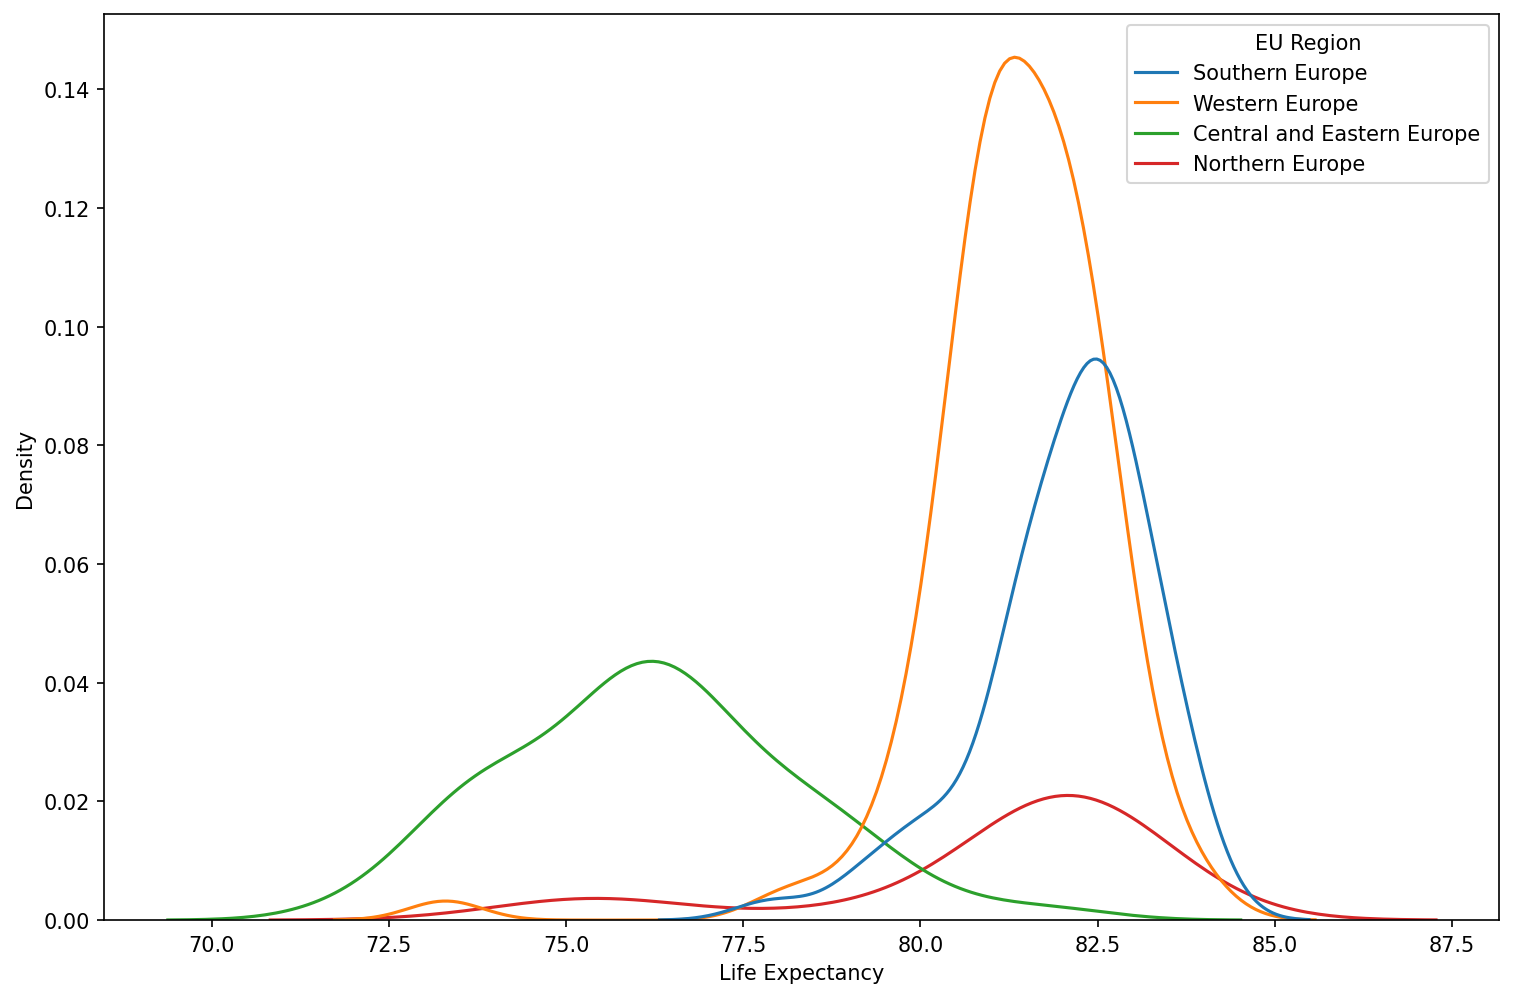

In [86]:
fig, ax = plt.subplots(figsize = (12,8))
sns.kdeplot(data = df, x = 'Life Expectancy',
             hue = 'EU Region', ax = ax)
plt.show()

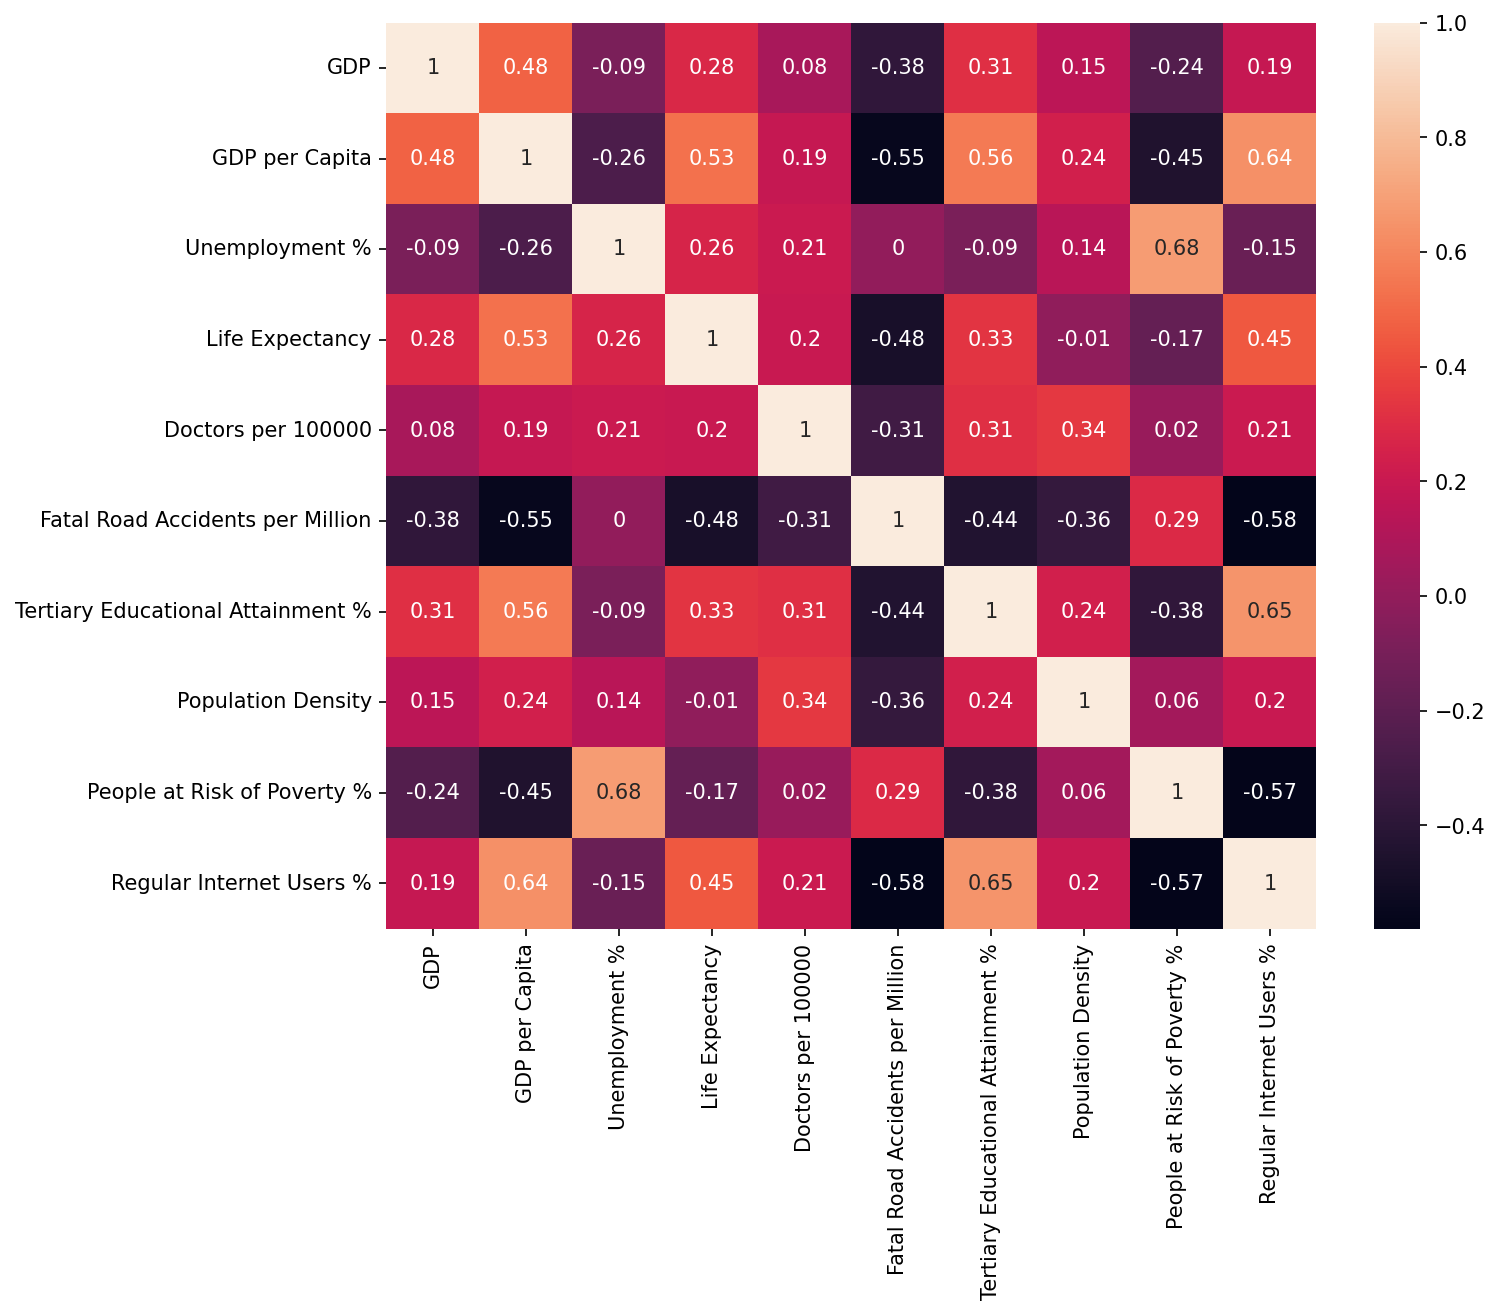

In [87]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr().round(2), annot=True)
plt.show()

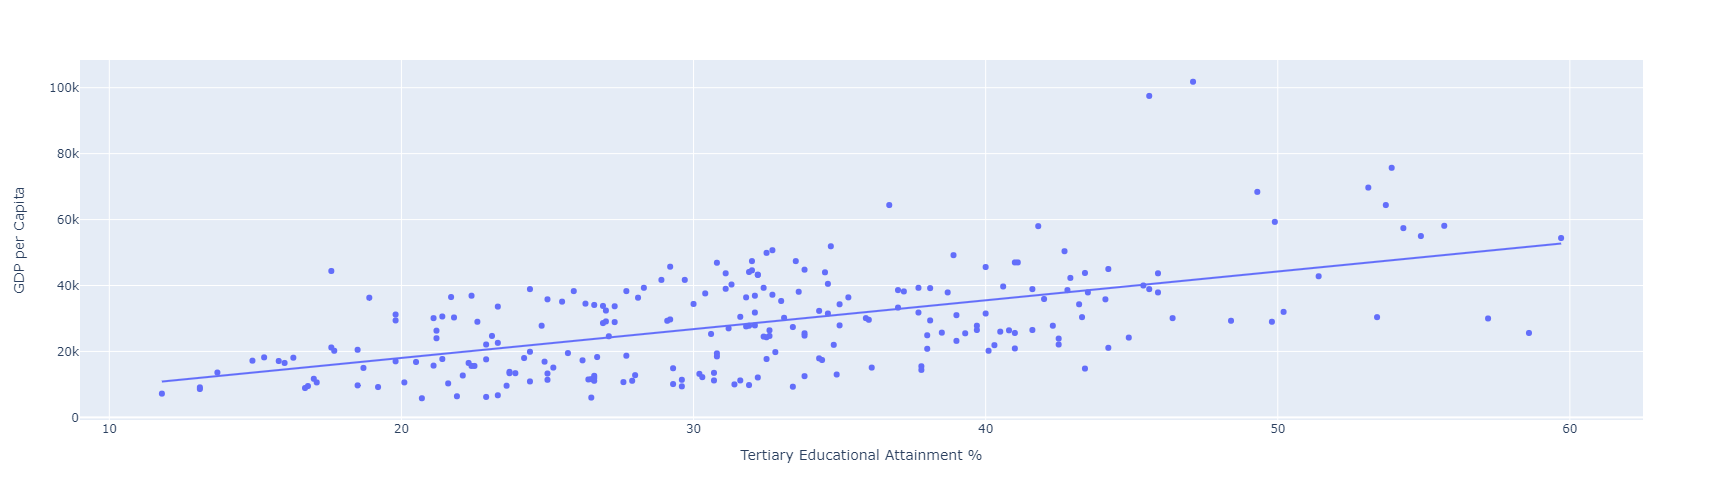

In [88]:
df.plot(kind = 'scatter', backend = 'plotly',
        x = 'Tertiary Educational Attainment %', y = 'GDP per Capita',
        trendline = 'ols',
        height = 500)

In [89]:
cols_num = ['GDP', 'GDP per Capita', 'Unemployment %',
            'Life Expectancy', 'Doctors per 100000',
            'Fatal Road Accidents per Million',
            'Tertiary Educational Attainment %',
            'Population Density', 'People at Risk of Poverty %',
            'Regular Internet Users %']

imputer = KNNImputer()
df[cols_num] = imputer.fit_transform(df[cols_num])

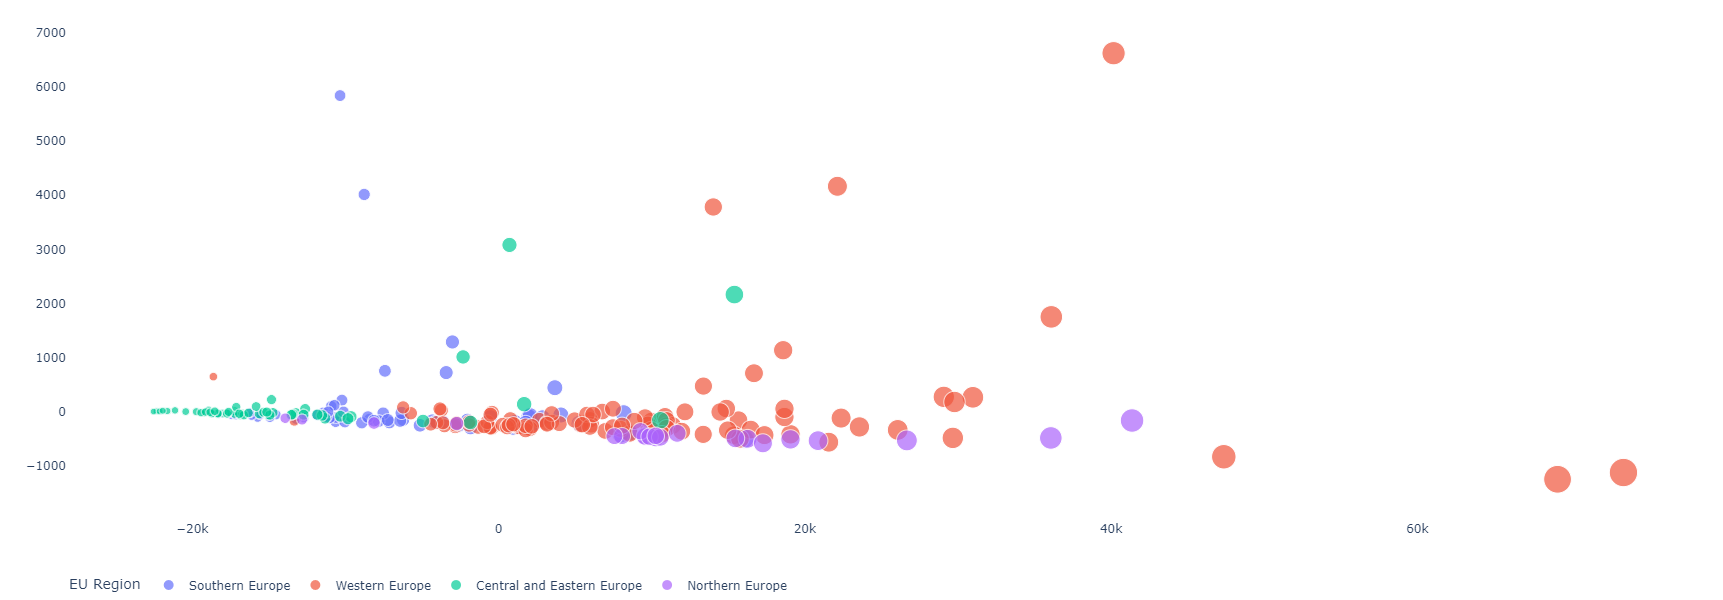

In [96]:
cols_num = ['GDP per Capita', 'Unemployment %',
            'Life Expectancy', 'Doctors per 100000',
            'Fatal Road Accidents per Million',
            'Tertiary Educational Attainment %',
            'Population Density', 'People at Risk of Poverty %',
            'Regular Internet Users %']

pca = PCA(n_components = 2)
components = pca.fit_transform(df[cols_num])
total_var = pca.explained_variance_ratio_.sum() * 100

df_ = df.join(pd.DataFrame(components, index = df.index))
df_.reset_index(inplace = True)

fig = px.scatter(df_, x=0, y=1, color=df_['EU Region'],
                 width = 800, height = 600, size = 'GDP per Capita',
                 hover_data = ['region_name', 'GDP per Capita'])

fig.update_layout(  margin={"r":1,"t":15,"l":1,"b":1},
                    plot_bgcolor = '#FFFFFF',
                    legend = dict(orientation = 'h', yanchor = 'top'),
                    yaxis_title='', xaxis_title='',
                    title = "")

hovertemplate = '%{customdata[0]}' 
fig.update_traces(hovertemplate=hovertemplate)
                
fig.show()

In [91]:
df_.sort_values(0)

,region_name,GDP,Country,EU Region,GDP per Capita,Unemployment %,Life Expectancy,Doctors per 100000,Fatal Road Accidents per Million,Tertiary Educational Attainment %,Population Density,People at Risk of Poverty %,Regular Internet Users %,0,1
237,Северозападен (Severozapaden),4.19,BG,Central and Eastern Europe,5800.0,11.1,72.1,448.70,98.0,20.7,39.0,41.30,62.0,-22535.103516,4.500856
236,Северен централен (Severen tsentralen),4.59,BG,Central and Eastern Europe,6000.0,6.7,72.8,333.20,81.0,26.5,53.1,35.90,70.0,-22335.094671,11.846509
240,Югоизточен (Yugoiztochen),6.36,BG,Central and Eastern Europe,6200.0,5.6,73.3,341.89,88.0,22.9,52.5,36.60,65.0,-22135.116905,8.738842
241,Южен централен (Yuzhen tsentralen),8.99,BG,Central and Eastern Europe,6400.0,4.0,73.9,403.78,55.0,21.9,63.7,37.70,63.0,-21934.856976,19.549747
238,Североизточен (Severoiztochen),6.19,BG,Central and Eastern Europe,6700.0,6.1,73.5,397.76,72.0,23.3,63.7,34.70,71.0,-21634.905498,15.090577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Région de Bruxelles-Capitale/ Brussels Hoofdst...,83.85,BE,Western Europe,68400.0,12.4,79.4,390.38,13.0,49.3,7526.7,18.40,89.0,40161.968378,6619.674831
70,Hovedstaden,128.90,DK,Northern Europe,69700.0,5.7,81.5,500.65,15.0,53.1,756.0,17.50,95.0,41368.777281,-160.099972
49,Eastern and Midland,186.17,IE,Western Europe,75700.0,6.4,82.6,485.59,21.0,53.9,169.8,19.00,95.0,47360.095363,-829.381131
177,Southern,160.27,IE,Western Europe,97500.0,6.5,82.5,485.59,38.0,45.6,55.6,20.40,92.0,69156.398364,-1244.995606
